#### To conduct different experiements, the only thing that needs to be changed is:
- the name of the molecule
- the molecule's path (check out the molecules folder for whats available
- (optional) number of active of active orbitals and electrons
- ansatz (modify the ansatz based on the number of qubits)

In [1]:
#import packages
import numpy as np
import pennylane as qml
from pennylane import expval, var, device
pi = np.pi

In [2]:
name ='H2';charge = 0;multiplicity=1;basis= 'sto-3g';geometry = 'molecules/h2.xyz';
h, nr_qubits = qml.qchem.generate_hamiltonian(
    name,
    geometry,
    charge,
    multiplicity,
    basis,
    mapping='jordan_wigner',
    n_active_orbitals=2,
    n_active_electrons=2,
)
print(h, '\n', nr_qubits)

(-0.04207897647782277) [I0]
+ (0.17771287465139946) [Z0]
+ (0.1777128746513994) [Z1]
+ (-0.2427428051314046) [Z2]
+ (-0.24274280513140462) [Z3]
+ (0.17059738328801055) [Z0 Z1]
+ (0.04475014401535163) [Y0 X1 X2 Y3]
+ (-0.04475014401535163) [Y0 Y1 X2 X3]
+ (-0.04475014401535163) [X0 X1 Y2 Y3]
+ (0.04475014401535163) [X0 Y1 Y2 X3]
+ (0.12293305056183797) [Z0 Z2]
+ (0.1676831945771896) [Z0 Z3]
+ (0.1676831945771896) [Z1 Z2]
+ (0.12293305056183797) [Z1 Z3]
+ (0.1762764080431959) [Z2 Z3] 
 4


In [3]:
dev = qml.device("default.qubit", wires=4)
def ansatz(params, wires=[0,1,2,3]):
    for i in wires:
        qml.RY(params[i], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])

    for i in wires:
        qml.RY(params[i+nr_qubits], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])


initial_params = np.random.uniform(low=0, high=2*np.pi, size=(nr_qubits * 2))

In [4]:
cost = qml.VQECost(ansatz, h, dev)
cost(initial_params)

0.06482908016061503

In [5]:
import time
max_iterations = 500
step_size = 0.05
conv_tol = 1e-06
opt = qml.GradientDescentOptimizer(stepsize=0.05)

vqe_cost = []


prev_energy = cost(initial_params)

#Vanilla Gradient Descent

start = time.time()
params = initial_params
for n in range(max_iterations):

    #calculate vanilla gradient descent
    params = opt.step(cost, params)

    #calculate new energy with updates params
    energy = cost(params)
    vqe_cost.append(energy)

    #calculate convergence
    conv = np.abs(energy - prev_energy)

    if n % 20 == 0:
        print('Iteration = ', n,  'Ground-state energy = ', energy, 'Ha',  'Convergence parameter =', conv, 'Ha')

    if conv <= conv_tol:
        print("Groundate found: {:9f}".format(cost(params)))
        break
        

    prev_energy = energy
end = time.time() - start
print(end)

Iteration =  0 Ground-state energy =  0.06157862114221477 Ha Convergence parameter = 0.0032504590184002646 Ha
Iteration =  20 Ground-state energy =  -0.017712062265036355 Ha Convergence parameter = 0.0045818070410073575 Ha
Iteration =  40 Ground-state energy =  -0.11735348390219867 Ha Convergence parameter = 0.005134210577371248 Ha
Iteration =  60 Ground-state energy =  -0.21332854074713217 Ha Convergence parameter = 0.004307525371302606 Ha
Iteration =  80 Ground-state energy =  -0.28460264922986556 Ha Convergence parameter = 0.0028919909578638547 Ha
Iteration =  100 Ground-state energy =  -0.33027636810144556 Ha Convergence parameter = 0.0018211382363180761 Ha
Iteration =  120 Ground-state energy =  -0.360187363543274 Ha Convergence parameter = 0.0012711290216919635 Ha
Iteration =  140 Ground-state energy =  -0.38291072059189585 Ha Convergence parameter = 0.0010482994694354653 Ha
Iteration =  160 Ground-state energy =  -0.402834165126575 Ha Convergence parameter = 0.000958890905661313

In [7]:
import openfermion

#of_ham = qml.qchem._terms_to_qubit_operator(h.coeffs, h.ops)
#lin = openfermion.utils.LinearQubitOperator(of_ham, 4)
#ground_state = openfermion.utils.get_ground_state(lin)
#print(ground_state[0])

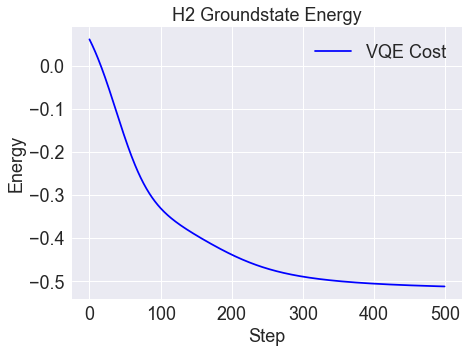

In [9]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
fig = plt.figure(figsize=(7,5))

plt.plot(vqe_cost, "b", label="VQE Cost")
#plt.axhline(y=ground_state[0], color='r', linestyle='--', label='Exact groundstate')

plt.ylabel("Energy", fontsize=18)
plt.xlabel("Step", fontsize=18)
plt.title('H2 Groundstate Energy', fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)
plt.show()

In [ ]:
165 s